In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
from tqdm import tqdm
from cp_functions import *
from scipy.stats import linregress
from scipy.optimize import minimize

# Verification of convergence rate 1

In [2]:
T = 3
init = [1, 1, 1]
W_current = [2, 2, 2]
W_bar = [2, 2, 2]
Q = [0.6, 0.7, 0.5]
C = [6, 4, 3, 4, 6]
D = [100, 100, 100]
alpha = [0.5, 0.5, 0.5]

In [3]:
upper = solve_cp_post(T, init, W_current, W_bar, Q, C, D, alpha)[0]
print("rel is "+str(upper))

rel is 31.7428406393587


In [4]:
check_cp_degeneracy(T, init, W_bar, Q, C, D, alpha)

Strict complementary slackness condition is satisfied.


This problem satisfy the conditions for Assumption 3.3 of $C^2$-smoothness of the update policy

In [5]:
my_sigma = [0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3]
for sigma in my_sigma:
    perfs = []
    if sigma <= 0.1:
        repeat_times = 16000
    else:
        repeat_times = 4000
    for _ in tqdm(range(repeat_times)):
        perf = update_policy(T, init, 0., W_bar, Q, C, D, alpha, sigma)
        perfs.append(perf)
    gap = upper - np.mean(perfs)
    std_err = np.std(perfs)/np.sqrt(len(perfs)-1)
    print("sigma = " + str(sigma) + ", optimality gap of update is: " + str(gap) + " +- " + str(2*std_err))

 11%|█         | 1698/16000 [04:08<33:54,  7.03it/s]C:\Users\cyan\AppData\Roaming\Python\Python39\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|██████████| 16000/16000 [39:29<00:00,  6.75it/s]


sigma = 0.025, optimality gap of update is: 0.005460634689335109 +- 0.0005125383772153473


100%|██████████| 16000/16000 [39:51<00:00,  6.69it/s]


sigma = 0.05, optimality gap of update is: 0.017489287693372546 +- 0.0010256191675451186


100%|██████████| 16000/16000 [39:31<00:00,  6.75it/s]


sigma = 0.075, optimality gap of update is: 0.03272491524875676 +- 0.0015374772053246774


100%|██████████| 16000/16000 [40:13<00:00,  6.63it/s]


sigma = 0.1, optimality gap of update is: 0.05562638522763308 +- 0.0020402154566851157


100%|██████████| 4000/4000 [10:04<00:00,  6.62it/s]


sigma = 0.15, optimality gap of update is: 0.10703244801970158 +- 0.005956551011085338


100%|██████████| 4000/4000 [10:04<00:00,  6.62it/s]


sigma = 0.2, optimality gap of update is: 0.18054763134957952 +- 0.007780166234854758


100%|██████████| 4000/4000 [10:04<00:00,  6.62it/s]


sigma = 0.25, optimality gap of update is: 0.2566410853995791 +- 0.009746411541249713


100%|██████████| 4000/4000 [09:27<00:00,  7.04it/s]

sigma = 0.3, optimality gap of update is: 0.3462588838625855 +- 0.012249810026363316


In [18]:
my_sigma = [0.125, 0.175, 0.225, 0.275]
for sigma in my_sigma:
    perfs = []
    repeat_times = 4000
    for _ in tqdm(range(repeat_times)):
        perf = update_policy(T, init, 0., W_bar, Q, C, D, alpha, sigma)
        perfs.append(perf)
    gap = upper - np.mean(perfs)
    std_err = np.std(perfs)/np.sqrt(len(perfs)-1)
    print("sigma = " + str(sigma) + ", optimality gap of projection is: " + str(gap) + " +- " + str(2*std_err))

100%|██████████| 4000/4000 [10:51<00:00,  6.14it/s]


sigma = 0.125, optimality gap of projection is: 0.07962847766219738 +- 0.004991007649546592


100%|██████████| 4000/4000 [10:54<00:00,  6.11it/s]


sigma = 0.175, optimality gap of projection is: 0.1368792337365008 +- 0.006751771526626453


100%|██████████| 4000/4000 [10:55<00:00,  6.10it/s]


sigma = 0.225, optimality gap of projection is: 0.21996685508193536 +- 0.008783476100725126


100%|██████████| 4000/4000 [10:26<00:00,  6.38it/s]

sigma = 0.275, optimality gap of projection is: 0.30313438239116763 +- 0.010890120567634654


In [42]:
my_sigma = [0.4, 0.5, 0.6, 0.7, 0.8]
for sigma in my_sigma:
    perfs = []
    repeat_times = 4000
    for _ in tqdm(range(repeat_times)):
        perf = update_policy(T, init, 0., W_bar, Q, C, D, alpha, sigma)
        perfs.append(perf)
    gap = upper - np.mean(perfs)
    std_err = np.std(perfs)/np.sqrt(len(perfs)-1)
    print("sigma = " + str(sigma) + ", optimality gap of update is: " + str(gap) + " +- " + str(2*std_err))

100%|██████████| 4000/4000 [08:47<00:00,  7.58it/s]


sigma = 0.4, optimality gap of update is: 0.5246111956191939 +- 0.01631033380082629


100%|██████████| 4000/4000 [08:40<00:00,  7.69it/s]


sigma = 0.5, optimality gap of update is: 0.7145784718481671 +- 0.020450854354103695


100%|██████████| 4000/4000 [08:42<00:00,  7.66it/s]


sigma = 0.6, optimality gap of update is: 0.9214381390475559 +- 0.02540015130329902


100%|██████████| 4000/4000 [08:42<00:00,  7.66it/s]


sigma = 0.7, optimality gap of update is: 1.1057861739613664 +- 0.029742208424266496


100%|██████████| 4000/4000 [08:44<00:00,  7.63it/s]

sigma = 0.8, optimality gap of update is: 1.2893143134168774 +- 0.033825843572297544


In [19]:
my_sigma = [0.9,1.0]
for sigma in my_sigma:
    perfs = []
    repeat_times = 4000
    for _ in tqdm(range(repeat_times)):
        perf = update_policy(T, init, 0., W_bar, Q, C, D, alpha, sigma)
        perfs.append(perf)
    gap = upper - np.mean(perfs)
    std_err = np.std(perfs)/np.sqrt(len(perfs)-1)
    print("sigma = " + str(sigma) + ", optimality gap of projection is: " + str(gap) + " +- " + str(2*std_err))

100%|██████████| 4000/4000 [10:22<00:00,  6.43it/s]


sigma = 0.9, optimality gap of projection is: 1.4190750814318314 +- 0.03561694506129116


100%|██████████| 4000/4000 [10:29<00:00,  6.35it/s]

sigma = 1.0, optimality gap of projection is: 1.5101879955504138 +- 0.03798330554911236


Plot!

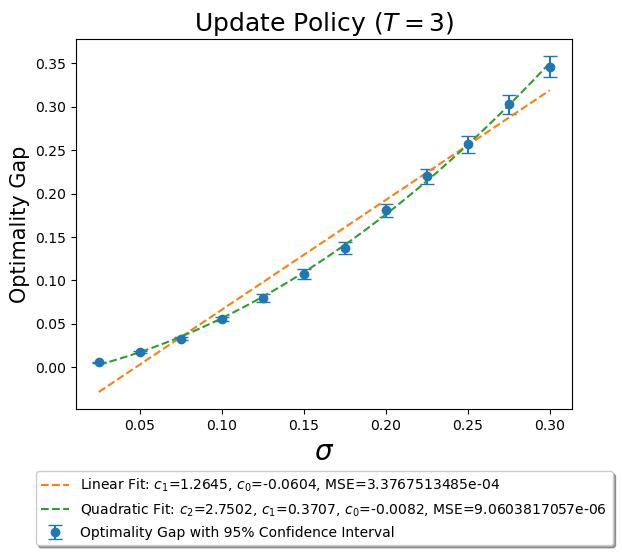

In [11]:
sigmas = [0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3]
gap = [0.005460634689335109, 0.017489287693372546, 0.03272491524875676, 0.05562638522763308, 0.07962847766219738,
       0.10703244801970158, 0.1368792337365008, 0.18054763134957952, 0.21996685508193536, 0.2566410853995791, 
       0.30313438239116763, 0.3462588838625855]
ci = [0.0005125383772153473, 0.0010256191675451186, 0.0015374772053246774, 0.0020402154566851157, 0.004991007649546592,
      0.005956551011085338, 0.006751771526626453, 0.007780166234854758, 0.008783476100725126, 0.009746411541249713, 
      0.010890120567634654, 0.012249810026363316]

# Create the plot
plt.errorbar(sigmas, gap, yerr=ci, fmt='o', capsize=5, label="Optimality Gap with 95% Confidence Interval")
plt.xlabel("$\sigma$",size=20)
plt.ylabel("Optimality Gap",size=15)
plt.title("Update Policy ($T=3$)",size=18)

# Perform linear regression
lin_coefficients = np.polyfit(sigmas, gap, deg=1)
lin_fit = np.poly1d(lin_coefficients)
lin_mse = np.mean((lin_fit(sigmas) - gap)**2)

# Perform quadratic regression
quad_coefficients = np.polyfit(sigmas, gap, deg=2)
quad_fit = np.poly1d(quad_coefficients)
quad_mse = np.mean((quad_fit(sigmas) - gap)**2)


# Add the regression curves to the plot
regression_curve_x = np.linspace(min(sigmas), max(sigmas), num=100)
plt.plot(regression_curve_x, lin_fit(regression_curve_x), linestyle="--", 
         label=f"Linear Fit: $c_1$={lin_coefficients[0]:.4f}, $c_0$={lin_coefficients[1]:.4f}, MSE={lin_mse:.10e}")
plt.plot(regression_curve_x, quad_fit(regression_curve_x), linestyle="--", 
         label=f"Quadratic Fit: $c_2$={quad_coefficients[0]:.4f}, $c_1$={quad_coefficients[1]:.4f}, $c_0$={quad_coefficients[2]:.4f}, MSE={quad_mse:.10e}")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=1)

#plt.show()
plt.savefig("update-fit-1.pdf", bbox_inches='tight')


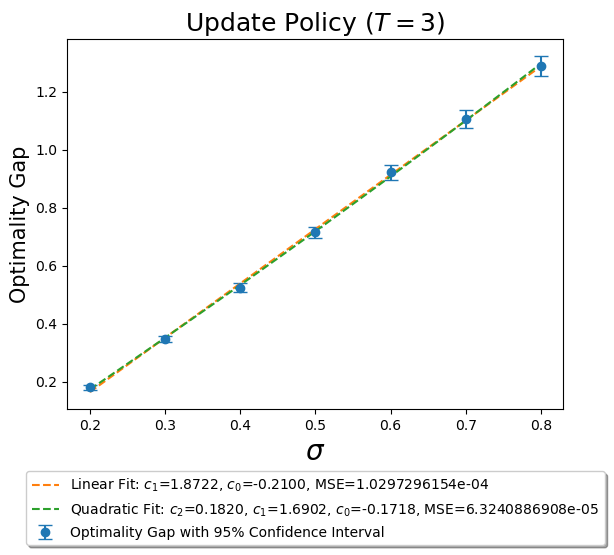

In [12]:
sigmas = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
gap = [0.18054763134957952, 0.3462588838625855, 0.5246111956191939, 0.7145784718481671, 0.9214381390475559, 1.1057861739613664, 
      1.2893143134168774]
ci = [0.007780166234854758,
     0.009746411541249713, 0.01631033380082629, 0.020450854354103695, 0.02540015130329902, 0.029742208424266496,
     0.033825843572297544]

# Create the plot
plt.errorbar(sigmas, gap, yerr=ci, fmt='o', capsize=5, label="Optimality Gap with 95% Confidence Interval")
plt.xlabel("$\sigma$",size=20)
plt.ylabel("Optimality Gap",size=15)
plt.title("Update Policy ($T=3$)",size=18)

# Perform linear regression
lin_coefficients = np.polyfit(sigmas, gap, deg=1)
lin_fit = np.poly1d(lin_coefficients)
lin_mse = np.mean((lin_fit(sigmas) - gap)**2)

# Perform quadratic regression
quad_coefficients = np.polyfit(sigmas, gap, deg=2)
quad_fit = np.poly1d(quad_coefficients)
quad_mse = np.mean((quad_fit(sigmas) - gap)**2)


# Add the regression curves to the plot
regression_curve_x = np.linspace(min(sigmas), max(sigmas), num=100)
plt.plot(regression_curve_x, lin_fit(regression_curve_x), linestyle="--", 
         label=f"Linear Fit: $c_1$={lin_coefficients[0]:.4f}, $c_0$={lin_coefficients[1]:.4f}, MSE={lin_mse:.10e}")
plt.plot(regression_curve_x, quad_fit(regression_curve_x), linestyle="--", 
         label=f"Quadratic Fit: $c_2$={quad_coefficients[0]:.4f}, $c_1$={quad_coefficients[1]:.4f}, $c_0$={quad_coefficients[2]:.4f}, MSE={quad_mse:.10e}")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=1)

#plt.show()
plt.savefig("update-fit-2.pdf", bbox_inches='tight')
